<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/Classification_Evaluation_Metrics_PaulGimeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paul Gimeno Fall 2022**

CSCI 6364 Machine Learning

pgimeno@gwu.edu 

**Binary Classification Metric Evaluation**



A model using a classifier has been trained and two vectors (y_actual and y_predict) is saved for a particular run. This notebook details an analysis of model performance using various evaluation metrics.

* **We have determined that there is baseline F score of 0.65 prior to this model's specific run** 

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [84]:
#after model training, we evaluate our model with our predicted classes and compare it with actual classes. In this particular case, we assume that 1's reach the threshold where it considered in the positive class and 0 being in the negative class.
y_actual = [0, 1, 1, 0, 0, 1]
y_predict = [0, 1, 1, 1, 0, 1]

In [85]:
#a confusion matrix is constructed to aggrgate prediction performance against our true value (or in this case, our test sample)
cm = confusion_matrix(y_actual, y_predict)
#the ravel method convers a 2d numpy array to a single list that sequentially lists true negative, false positive, false negative and true positive in this order. As we can see, we can observe this order by manually observing y_actual and y_predict indexes.
tn, fp, fn, tp = cm.ravel()
print(cm.ravel())

[2 1 0 3]


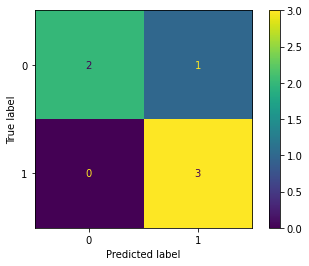

In [86]:
#plotting the confusion matrix using sklearn's library
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# **Confusion Matrix**

In [87]:
print(f'The True Positives (bottom right) in the matrix: {tp}, indicates predicted true values that are TRUE \n\
The True Negatives (upper left) in the matrix: {tn}, indicates predicted false values that are FALSE \n\
The False Positives in the matrix (upper right): {fp}, indicates predicted positive values that are FALSE \n\
The False Negatives in the matrix (lower left): {fn}, indicates predicted negative values that are TRUE ')

The True Positives (bottom right) in the matrix: 3, indicates predicted true values that are TRUE 
The True Negatives (upper left) in the matrix: 2, indicates predicted false values that are FALSE 
The False Positives in the matrix (upper right): 1, indicates predicted positive values that are FALSE 
The False Negatives in the matrix (lower left): 0, indicates predicted negative values that are TRUE 


# **Accuracy**

In [88]:
print(f'Accuracy is defined as the total correct predictions over all samples, TP + TN / (TP + TN + FP + FN), in this evaluation, the model accuracy is: {round((tp + tn) / (tp+tn+fp+fn))*100}%\n\
This can be interpreted as out of 100 samples, it correctly predicted 83 cases')

Accuracy is defined as the total correct predictions over all samples, TP + TN / (TP + TN + FP + FN), in this evaluation, the model accuracy is: 100%
This can be interpreted as out of 100 samples, it correctly predicted 83 cases


In [89]:
#As an alternative, we can use sklearn's evaluation metric method called accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_actual, y_predict)

0.8333333333333334

## Precision

Often times determining accuracy is not adequate to evaluate model performance if the sample is biased. For example, if in 100 samples, there's only 1 instance of the positive class, the model can always predict the negative class and have a 99/100 accuracy. If we care about the positive class prediction, the accuracy metric is misleading.

**Precision** can be defined as: of all the predicted positive classes, how many are actually positive? or in another term, how many correct positive predictions were made across all positive samples.

This measure would be weighed more if we actually care about the predictive power of the model of a particular class in addition for accounting for cases where the sample distribution are heavily biased.

In [90]:
print(f'precision can be manually calculated as tp / tp + fp, in the example statement the value is: {tp / (tp + fp)}, \n\
there were {tp} positive predictions (tp) out of {tp + fp} (tp + fp) positive samples  ')

precision can be manually calculated as tp / tp + fp, in the example statement the value is: 0.75, 
there were 3 positive predictions (tp) out of 4 (tp + fp) positive samples  


In [91]:
#similarly we can compute this value using sklearn's precision_score method
from sklearn.metrics import precision_score

print(precision_score(y_actual,y_predict))

0.75


## Recall

Closely related to related to precision is the measure called recall.

**Recall** can be defined as: of all the actual positive classes, how many are predicted as positive?

In [92]:
print(f'recall can be manually calculated as tp / tp + fn, in the example statement the value is: {tp / (tp + fn)}')

recall can be manually calculated as tp / tp + fn, in the example statement the value is: 1.0


In [93]:
#similarly we can compute this value using sklearn's recall method

from sklearn.metrics import recall_score

print(recall_score(y_actual, y_predict))

#with a recall score of 1, we were able to predict all of the positive classes

1.0


# F Score

Depending on the problem statement, we either value precision over recall if for example, we want to reduce the instances or consequences of false positives. In this classification problem, if the positive class indicates a decision to retaliate using nuclear weapons (positive class) vs not retaliate using nuclear weapons (negative class), we would value high precision in a higher priority as this ensures that a large proportion of our predicted positive class are actually positive class. 

Recall would be weighed more if the instances of false negatives (type II) errors are not acceptable.

We can use a ratio of precision and recall to determine the model's accuracy. [F1 score is the harmonic mean of precision and recall.](https://https://en.wikipedia.org/wiki/F-score) 

for this problem statement, we can calculate an F1 score using:

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/b006f28426fcf95c08de4be0597f7894d86bfccd">

In [95]:
#This model run's F1 score which is a balanced approach in weighing precision and recall

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f_1 = (2*precision*recall)/(precision+recall)
print(f_1)

0.8571428571428571


**F beta Scores**

If we want to weigh either recall or precision over another, we can designate a beta parameter to the f score using the formula

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff'>

[source](https://en.wikipedia.org/wiki/F-score)

In [81]:
#in the case of beta = 0.5, more weight on precision but less on precision 

beta_05 = 0.5
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score_beta05 = (1 + beta**2)*(precision*recall)*1/(((beta**2) * precision) + recall)
print(f_score_beta05)

0.7894736842105263


In [96]:
#in the case of beta = 2, more weight on recall and less weight on precision
beta_2 = 2
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_2 = (1 + beta_2**2)*(precision*recall)*1/(((beta_2**2) * precision) + recall)
print(f_2)

0.9375


# Comparing model metrics to baseline

our baseline F1 score is .65

* Since this model's F1 score is .85, we determine that this model is more accurate than the baseline with a balanced precision/recall Fmeasure

* If we value precision and determine that false positives are detrimental to decision making, we can compare the baseline's f1 score with a beta of .5 for example to this model's f1 score of .789

* if we value predicting as much positive classes from the sample, having a higher recall or higher beta would be ideal compared to our baseline.

In [98]:
#we also can calculate the f1 measure using the sklearn classification_report measure

from sklearn.metrics import classification_report
print(classification_report(y_actual,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

